<a href="https://colab.research.google.com/github/ShreyJais/RL/blob/main/23458558_RL_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MDP Simulation and Value Iteration

In [20]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 3
states = [(i, j) for i in range(grid_size) for j in range(grid_size)]
actions = ['up', 'down', 'left', 'right']

goal_state = (2, 2)
reward = np.zeros((grid_size, grid_size))
reward[goal_state] = 1

gamma = 0.9  # how much we value future rewards over immediate rewards

In [22]:
def next_state(state, action):
    i, j = state
    if action == 'up':
        return max(i - 1, 0), j
    elif action == 'down':
        return min(i + 1, grid_size - 1), j
    elif action == 'left':
        return i, max(j - 1, 0)
    elif action == 'right':
        return i, min(j + 1, grid_size - 1)
    return state

values = np.zeros((grid_size, grid_size))

def display_grid(values):
    for row in values:
        print(["{:.2f}".format(x) for x in row])

def value_iteration():
    epsilon = 1e-4
    while True:
        delta = 0
        new_values = values.copy()

        for state in states:
            if state == goal_state:
                continue

            i, j = state
            value_options = []
            for action in actions:
                next_i, next_j = next_state(state, action)
                reward_received = reward[next_i, next_j]
                value_options.append(reward_received + gamma * values[next_i, next_j])

            best_value = max(value_options)
            new_values[i, j] = best_value
            delta = max(delta, abs(best_value - values[i, j]))

        values[:, :] = new_values
        if delta < epsilon:
            break

In [23]:
value_iteration()
print("Values after convergence:")
display_grid(values)

Values after convergence:
['0.73', '0.81', '0.90']
['0.81', '0.90', '1.00']
['0.90', '1.00', '0.00']


In [25]:
policy = np.full((grid_size, grid_size), '', dtype=object)
for state in states:
    if state == goal_state:
        policy[state] = 'Goal'
        continue

    i, j = state
    action_values = {}
    for action in actions:
        next_i, next_j = next_state(state, action)
        action_values[action] = reward[next_i, next_j] + gamma * values[next_i, next_j]

    best_action = max(action_values, key=action_values.get)
    policy[i, j] = best_action

print("\nOptimal Policy:")
print(policy)


Optimal Policy:
[['down' 'down' 'down']
 ['down' 'down' 'down']
 ['right' 'right' 'Goal']]


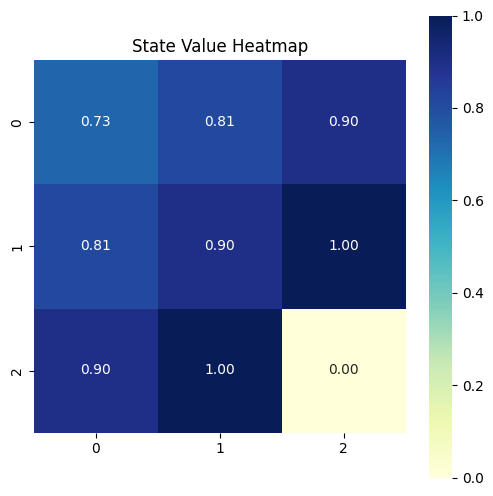

In [26]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(values, annot=True, fmt=".2f", cmap="YlGnBu", square=True)
plt.title("State Value Heatmap")
plt.show()
